In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import geopy
import geocoder
from geopy.geocoders import Nominatim
from datetime import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv',index_col = 0)
df['Hour'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')).astype('int64')
df['Month'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%m')).astype('int64')
df['Date'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%d-%m-%Y'))
df['Day'] = df['Date'].apply(lambda x : list(map(int,x.split('-')))).apply(lambda x : date(x[2],x[1],x[0]).weekday())
df['Time'] = pd.to_datetime(df['Time'])
df = df.drop('Coordinates',axis = 1)

In [3]:
cities = list(set(list(df.City)))
len(cities)

119

In [4]:
locator = Nominatim(user_agent="nielsen",timeout = 100)

coord = {}
for i,city in enumerate(cities):
    lc = locator.geocode(city)
    try:
        print(str(i+1)+'.'+ city + ' SUCCESS!')
        coord[city] = [lc.latitude,lc.longitude]
    except AttributeError:
        print(str(i+1)+'.'+city + ' DATA not available')

print(len(coord))   
coord

1.Alwar SUCCESS!
2.Siliguri SUCCESS!
3.Fatehabad SUCCESS!
4.Maihar SUCCESS!
5.Hisar SUCCESS!
6.Greater Noida SUCCESS!
7.Thane SUCCESS!
8.Gaya SUCCESS!
9.Narnaul SUCCESS!
10.Solapur SUCCESS!
11.Karnal SUCCESS!
12.Amritsar SUCCESS!
13.Hubballi SUCCESS!
14.Ankleshwar SUCCESS!
15.Udaipur SUCCESS!
16.Ahmedabad SUCCESS!
17.Palwal SUCCESS!
18.Kochi SUCCESS!
19.Tirupati SUCCESS!
20.Ghaziabad SUCCESS!
21.Yamunanagar SUCCESS!
22.Agra SUCCESS!
23.Muzaffarpur SUCCESS!
24.Kota SUCCESS!
25.Damoh SUCCESS!
26.Vapi SUCCESS!
27.Mandi Gobindgarh SUCCESS!
28.Katni SUCCESS!
29.Guwahati SUCCESS!
30.Hyderabad SUCCESS!
31.Howrah SUCCESS!
32.Thiruvananthapuram SUCCESS!
33.Manesar SUCCESS!
34.Kalaburgi SUCCESS!
35.Ratlam SUCCESS!
36.Mandideep SUCCESS!
37.Varanasi SUCCESS!
38.Shillong SUCCESS!
39.Kanpur SUCCESS!
40.Satna SUCCESS!
41.Bagalkot SUCCESS!
42.Kolkata SUCCESS!
43.Panipat SUCCESS!
44.Aurangabad SUCCESS!
45.Jodhpur SUCCESS!
46.Amaravati SUCCESS!
47.Ballabgarh SUCCESS!
48.Muzaffarnagar SUCCESS!
49.Hapur S

{'Alwar': [27.639077049999997, 76.6144524902045],
 'Siliguri': [26.7164127, 88.4309916],
 'Fatehabad': [27.02766825, 78.2074341134146],
 'Maihar': [24.260444, 80.7592749],
 'Hisar': [29.168807, 75.7461103],
 'Greater Noida': [28.4670734, 77.5137649],
 'Thane': [19.1943294, 72.9701779],
 'Gaya': [24.7964355, 85.0079563],
 'Narnaul': [27.997083250000003, 76.0757621771358],
 'Solapur': [17.84990665, 75.27632027348457],
 'Karnal': [29.6803266, 76.9896254],
 'Amritsar': [31.6343083, 74.8736788],
 'Hubballi': [15.3518378, 75.1379848],
 'Ankleshwar': [21.6293206, 72.9945103],
 'Udaipur': [24.578721, 73.6862571],
 'Ahmedabad': [23.0216238, 72.5797068],
 'Palwal': [28.12502575, 77.35831300773046],
 'Kochi': [9.931308, 76.2674136],
 'Tirupati': [13.6316368, 79.4231711],
 'Ghaziabad': [28.711241, 77.4445372],
 'Yamunanagar': [30.2112003, 77.28638972360895],
 'Agra': [27.1752554, 78.0098161],
 'Muzaffarpur': [26.1486581, 85.34001282479626],
 'Kota': [25.1968256, 76.00089330885552],
 'Damoh': [23.7

In [5]:
df['Coordinates'] = df.City.map(coord)

In [6]:
cols = ['City','Coordinates','Time','Month','Hour','Date','Day','PM10_min','PM10_avg','PM10_max']
df_1 = df[cols].copy()
df_1

,City,Coordinates,Time,Month,Hour,Date,Day,PM10_min,PM10_avg,PM10_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,78.000000,121.000000,170.000000
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,64.000000,91.000000,113.000000
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,57.000000,69.000000,93.000000
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,44.000000,80.000000,114.000000
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,68.000000,81.000000,95.000000
...,...,...,...,...,...,...,...,...,...,...
32426,Vijayapura,"[16.666667, 75.916667]",2020-10-21 22:00:00,10,22,21-10-2020,2,35.000000,53.000000,94.000000
32427,Visakhapatnam,"[17.7231276, 83.3012842]",2020-10-21 22:00:00,10,22,21-10-2020,2,14.000000,97.000000,163.000000
32428,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-10-21 22:00:00,10,22,21-10-2020,2,85.000000,172.000000,335.000000
32429,Kolkata,"[22.54541245, 88.3567751581234]",2020-10-21 22:00:00,10,22,21-10-2020,2,17.714286,30.428571,45.428571


### Taking average for all cities over the period of data collection

In [7]:
df_1 = df_1[(df_1.Hour >= 7) & (df_1.Hour <= 22)]
df_1.head()

,City,Coordinates,Time,Month,Hour,Date,Day,PM10_min,PM10_avg,PM10_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,78.0,121.0,170.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,64.0,91.0,113.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,57.0,69.0,93.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,44.0,80.0,114.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,68.0,81.0,95.0


In [8]:
cities = sorted(list(set(df_1.City.to_list())))
print(len(cities))

119


In [9]:
list_dict = []
# 
for city in cities:
    dict_PM10 = {}
    dict_PM10['City'] = city
    dict_PM10['Max'] = df_1.loc[df_1.City == city]['PM10_max'].mean()
    dict_PM10['Avg'] = df_1.loc[df_1.City == city]['PM10_avg'].mean()
    dict_PM10['Min'] = df_1.loc[df_1.City == city]['PM10_min'].mean()
    dict_PM10['Coordinates'] = df_1.loc[df_1.City == city]['Coordinates'].values[0]
    list_dict.append(dict_PM10)
list_dict

[{'City': 'Agra',
  'Max': nan,
  'Avg': nan,
  'Min': nan,
  'Coordinates': [27.1752554, 78.0098161]},
 {'City': 'Ahmedabad',
  'Max': 146.0267175572519,
  'Avg': 105.43893129770993,
  'Min': 77.88167938931298,
  'Coordinates': [23.0216238, 72.5797068]},
 {'City': 'Ajmer',
  'Max': 131.9918367346939,
  'Avg': 86.98367346938775,
  'Min': 51.457142857142856,
  'Coordinates': [26.4691, 74.639]},
 {'City': 'Alwar',
  'Max': 117.13584905660377,
  'Avg': 84.97735849056603,
  'Min': 61.78867924528302,
  'Coordinates': [27.639077049999997, 76.6144524902045]},
 {'City': 'Amaravati',
  'Max': 67.02264150943397,
  'Avg': 44.80377358490566,
  'Min': 27.31320754716981,
  'Coordinates': [16.4998534, 81.3300812]},
 {'City': 'Ambala',
  'Max': 277.5622641509434,
  'Avg': 180.37358490566038,
  'Min': 124.55471698113207,
  'Coordinates': [30.3843674, 76.770421]},
 {'City': 'Amritsar',
  'Max': 169.86936936936937,
  'Avg': 124.82882882882883,
  'Min': 74.85585585585585,
  'Coordinates': [31.6343083, 74.

In [10]:
df_avg = pd.DataFrame(list_dict)
df_avg = df_avg.round(2)
df_avg.head()

,City,Max,Avg,Min,Coordinates
0,Agra,NaN,NaN,NaN,"[27.1752554, 78.0098161]"
1,Ahmedabad,146.03,105.44,77.88,"[23.0216238, 72.5797068]"
2,Ajmer,131.99,86.98,51.46,"[26.4691, 74.639]"
3,Alwar,117.14,84.98,61.79,"[27.639077049999997, 76.6144524902045]"
4,Amaravati,67.02,44.80,27.31,"[16.4998534, 81.3300812]"


In [11]:
df_avg.describe()

,Max,Avg,Min
count,114.000000,114.000000,114.000000
mean,175.364298,108.907281,66.977982
std,91.103490,57.659601,37.726773
min,26.830000,20.240000,3.000000
25%,105.155000,62.935000,36.217500
50%,153.930000,95.985000,58.345000
75%,241.220000,146.157500,99.277500
max,366.000000,246.060000,144.050000


In [12]:
def Radius(df,val):
    df[val+'_rad'] = np.sqrt(df[val])

In [13]:
def Create_Map():
    m3 = folium.Map(location = [23.2584857, 77.401989],zoom_start = 4.5,prefer_canvas=True)
    folium.TileLayer('Stamen Terrain').add_to(m3)
    folium.TileLayer('Stamen Toner').add_to(m3)
    folium.TileLayer('Stamen Water Color').add_to(m3)
    folium.TileLayer('cartodbpositron').add_to(m3)
    folium.TileLayer('cartodbdark_matter').add_to(m3)
    folium.LayerControl().add_to(m3)
    
    return m3

In [14]:
Radius(df_avg,'Avg')

In [15]:
PM10_map = Create_Map()

In [16]:
for city in df_avg.City :
    
    display = city +' '+ str(df_avg.loc[df_avg.City == city ,'Avg'].item())    

    if df_avg.loc[df_avg.City == city ,'Avg'].item() >= 146.15: 
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#FF5733',
                fill_color='#FF5733',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(PM10_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 95.98:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EE8C31',
                fill_color='#EE8C31',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(PM10_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 62.93:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EEE231',
                fill_color='#EEE231',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(PM10_map)
        
    else:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#5FFF33',
                fill_color='#5FFF33',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(PM10_map)

In [17]:
PM10_map

In [18]:
#PM10 levels
# excellent = 
# fine = 
# moderate = 
# poor = 

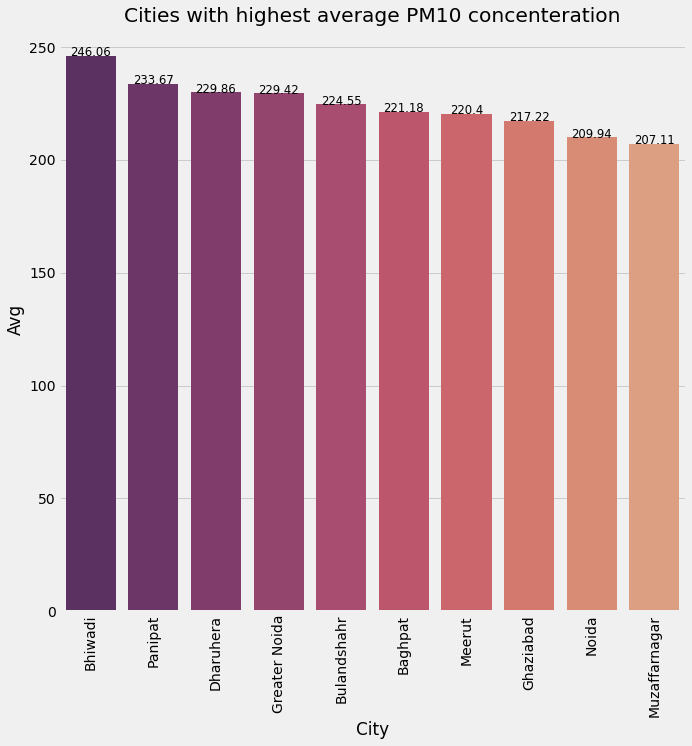

In [35]:
plt.figure(figsize=(10,10))
df_avg_top10 = df_avg.sort_values(by = 'Avg' ,ascending =False).head(10).reset_index()
pal = reversed(sns.color_palette('flare', len(df_avg_top10)))
g=sns.barplot(x='City',y='Avg',data=df_avg_top10, palette=pal)

for index, row in df_avg_top10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with highest average PM10 concenteration')
plt.xticks(rotation = 90)
plt.show()

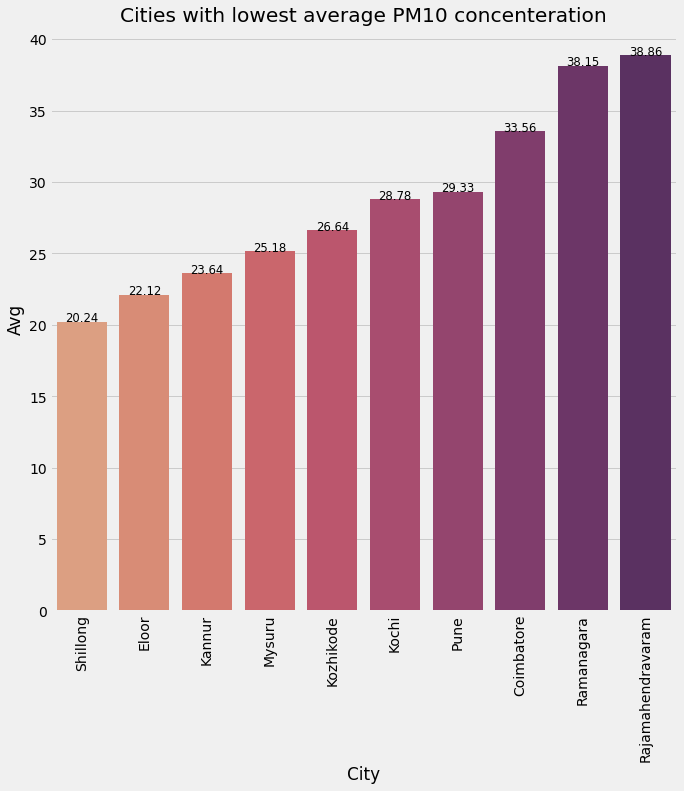

In [36]:
plt.figure(figsize=(10,10))
df_avg_last10 = df_avg.sort_values(by = 'Avg' ,ascending =False).dropna().tail(10).sort_values(by = 'Avg').reset_index()
g=sns.barplot(x='City',y='Avg',data=df_avg_last10, palette='flare')

for index, row in df_avg_last10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with lowest average PM10 concenteration')
plt.xticks(rotation = 90)
plt.show()

## DELHI

In [21]:
df_2 = df[cols].copy()
delhi = df_2.loc[df_2.City == 'Delhi'].copy()
print(delhi.shape)
delhi = delhi.reset_index(drop = True)
delhi = delhi.round(2)
delhi.head()

(300, 10)


,City,Coordinates,Time,Month,Hour,Date,Day,PM10_min,PM10_avg,PM10_max
0,Delhi,"[28.6273928, 77.1716954]",2020-09-22 14:00:00,9,14,22-09-2020,1,61.14,118.25,169.89
1,Delhi,"[28.6273928, 77.1716954]",2020-09-22 16:00:00,9,16,22-09-2020,1,58.92,113.22,168.08
2,Delhi,"[28.6273928, 77.1716954]",2020-09-22 19:00:00,9,19,22-09-2020,1,55.58,106.08,165.94
3,Delhi,"[28.6273928, 77.1716954]",2020-09-22 22:00:00,9,22,22-09-2020,1,54.97,99.64,156.72
4,Delhi,"[28.6273928, 77.1716954]",2020-09-23 04:00:00,9,4,23-09-2020,2,51.37,87.60,141.11


In [22]:
delhi.describe()

,Month,Hour,Day,PM10_min,PM10_avg,PM10_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,122.392500,195.881967,302.857900
std,0.370287,5.458002,1.871871,22.797752,41.462573,67.812297
min,9.000000,0.000000,0.000000,30.970000,71.710000,122.030000
25%,10.000000,9.000000,1.000000,115.530000,167.157500,249.172500
50%,10.000000,13.000000,2.000000,124.060000,195.265000,307.425000
75%,10.000000,17.000000,4.000000,135.240000,221.612500,361.667500
max,10.000000,23.000000,6.000000,160.300000,276.650000,404.940000


### Taking only the time from 7 am to 10 pm

(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='PM10_avg'>

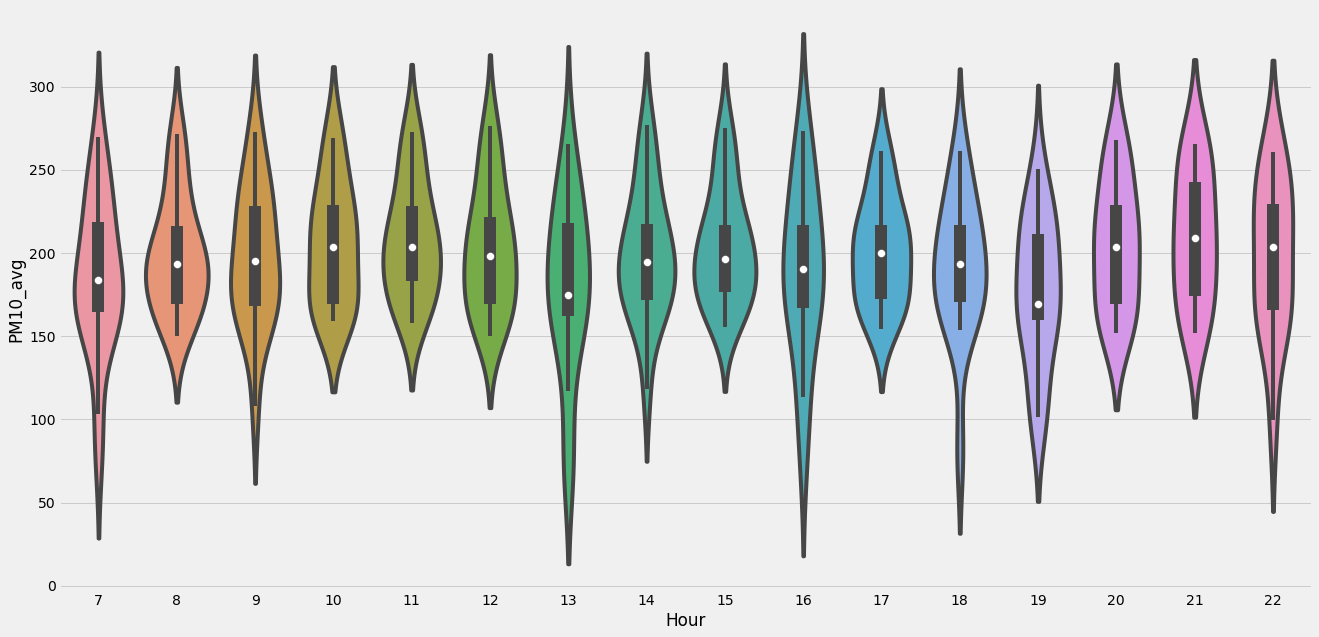

In [23]:
delhi = delhi[(delhi.Hour >= 7) & (delhi.Hour <= 22)]
print(delhi.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'PM10_avg',x = 'Hour',data = delhi)

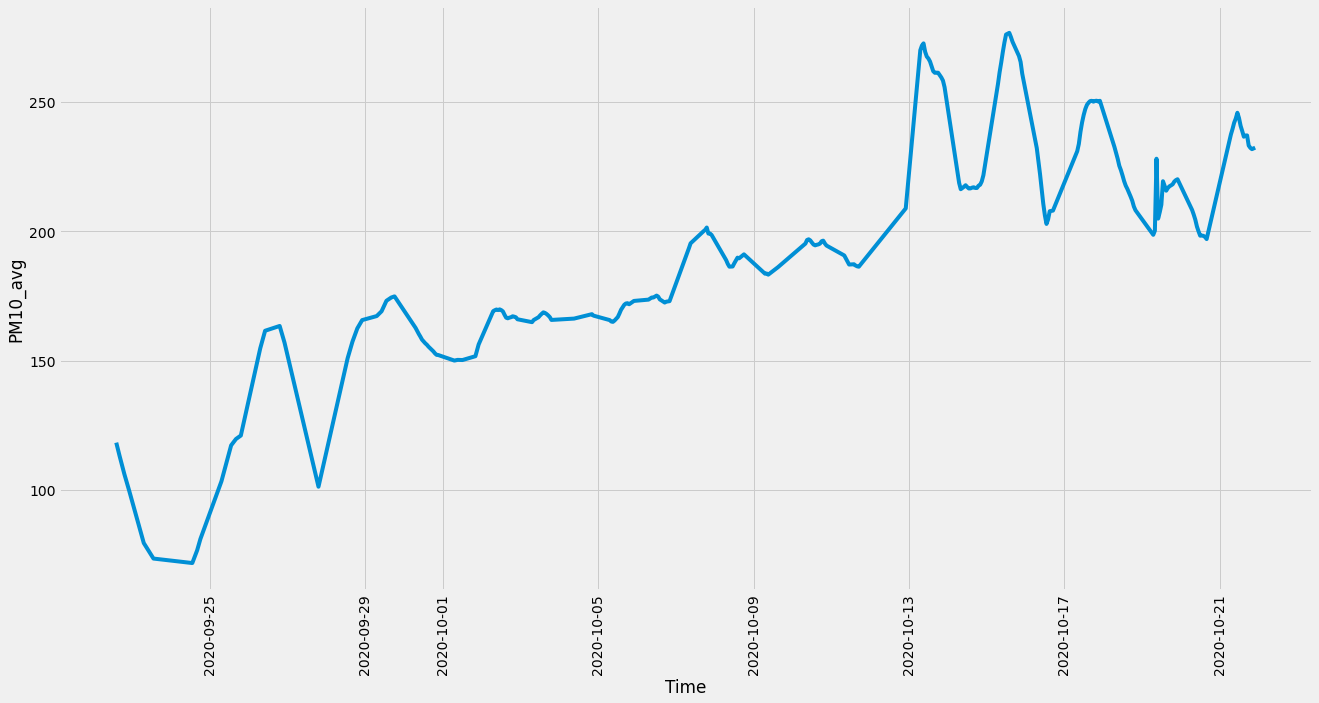

In [24]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'PM10_avg',x = 'Time',data = delhi,)
plt.xticks(rotation = 90)
plt.show()

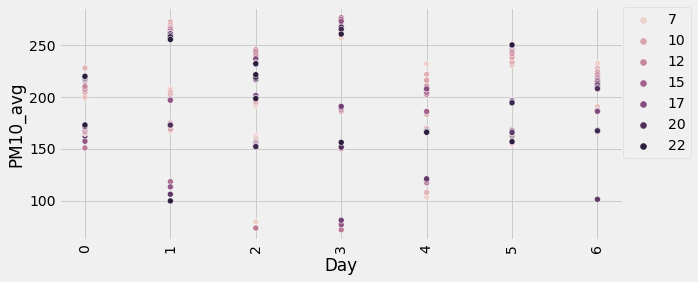

In [25]:
plt.figure(figsize = (9,4))
sns.scatterplot(y = 'PM10_avg',x = 'Day',hue = 'Hour',data = delhi) #color = ('#41cb89')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

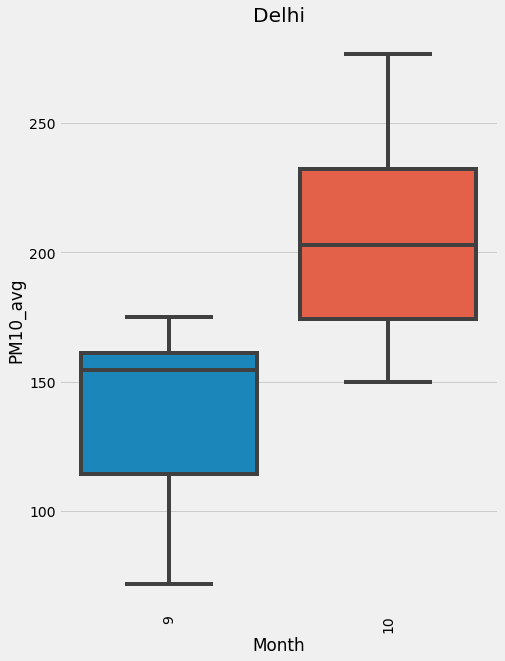

In [26]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'PM10_avg',x = 'Month',data = delhi)
plt.title('Delhi')
plt.xticks(rotation = 90)
plt.show()

In [27]:
delhi_sep = delhi[delhi.Month == 9].copy()
delhi_oct = delhi[delhi.Month == 10].copy()

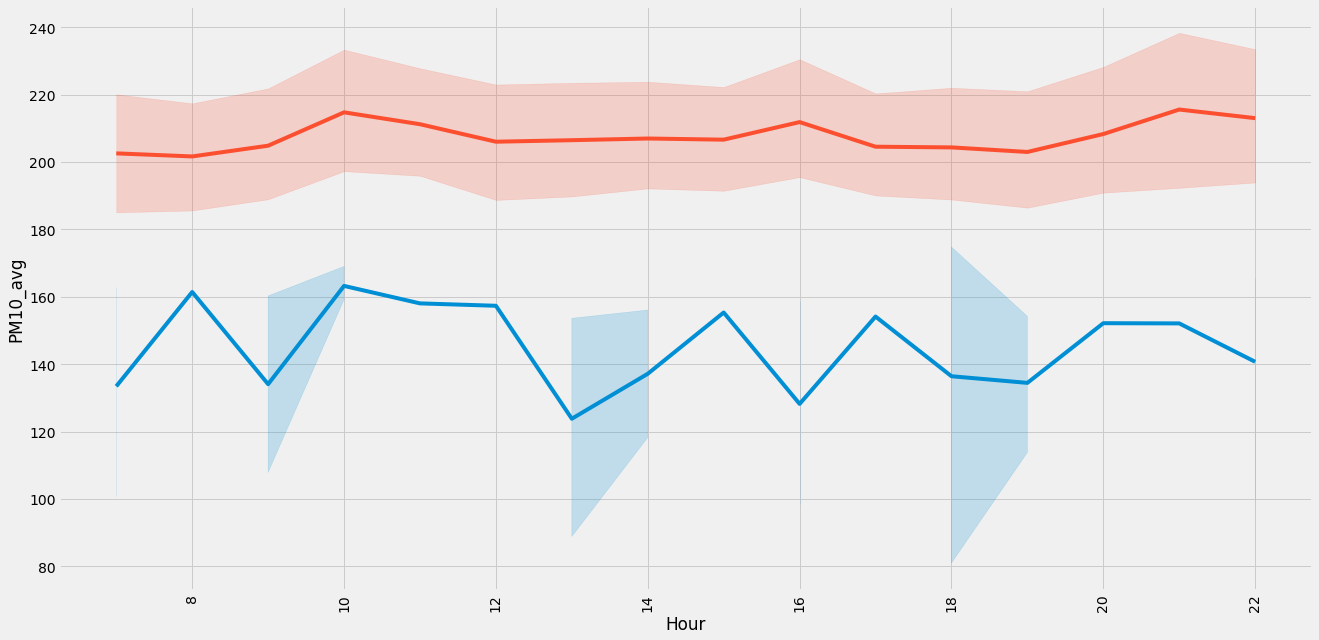

In [28]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'PM10_avg',x = 'Hour',data = delhi_sep)
sns.lineplot(y = 'PM10_avg',x = 'Hour',data = delhi_oct)
plt.xticks(rotation = 90)
plt.show()

### Mumbai

In [29]:
mum = df_2.loc[df_2.City == 'Mumbai'].copy()
mum = mum.reset_index(drop = True)
mum = mum.round(2)
mum.head()

,City,Coordinates,Time,Month,Hour,Date,Day,PM10_min,PM10_avg,PM10_max
0,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 14:00:00,9,14,22-09-2020,1,32.33,57.83,139.50
1,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 16:00:00,9,16,22-09-2020,1,31.17,57.50,139.50
2,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 19:00:00,9,19,22-09-2020,1,28.17,55.50,139.50
3,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 22:00:00,9,22,22-09-2020,1,24.00,53.83,139.50
4,Mumbai,"[18.9387711, 72.8353355]",2020-09-23 04:00:00,9,4,23-09-2020,2,21.50,54.83,142.17


In [30]:
mum.describe()

,Month,Hour,Day,PM10_min,PM10_avg,PM10_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,53.537667,81.896867,131.178000
std,0.370287,5.458002,1.871871,19.458297,21.727788,33.944027
min,9.000000,0.000000,0.000000,17.000000,39.670000,74.780000
25%,10.000000,9.000000,1.000000,40.875000,67.965000,108.500000
50%,10.000000,13.000000,2.000000,53.670000,78.765000,125.605000
75%,10.000000,17.000000,4.000000,64.597500,94.812500,152.710000
max,10.000000,23.000000,6.000000,101.140000,137.290000,226.250000


(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='PM10_avg'>

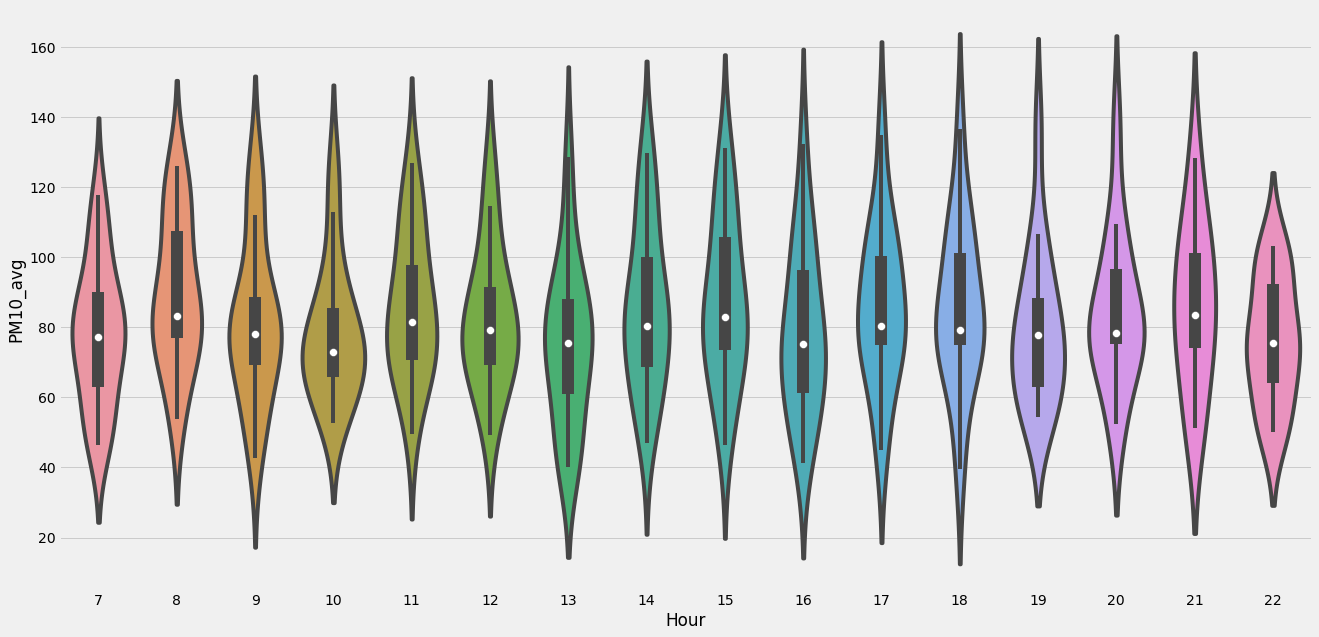

In [31]:
mum = mum[(mum.Hour >= 7) & (mum.Hour <= 22)]
print(mum.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'PM10_avg',x = 'Hour',data = mum)

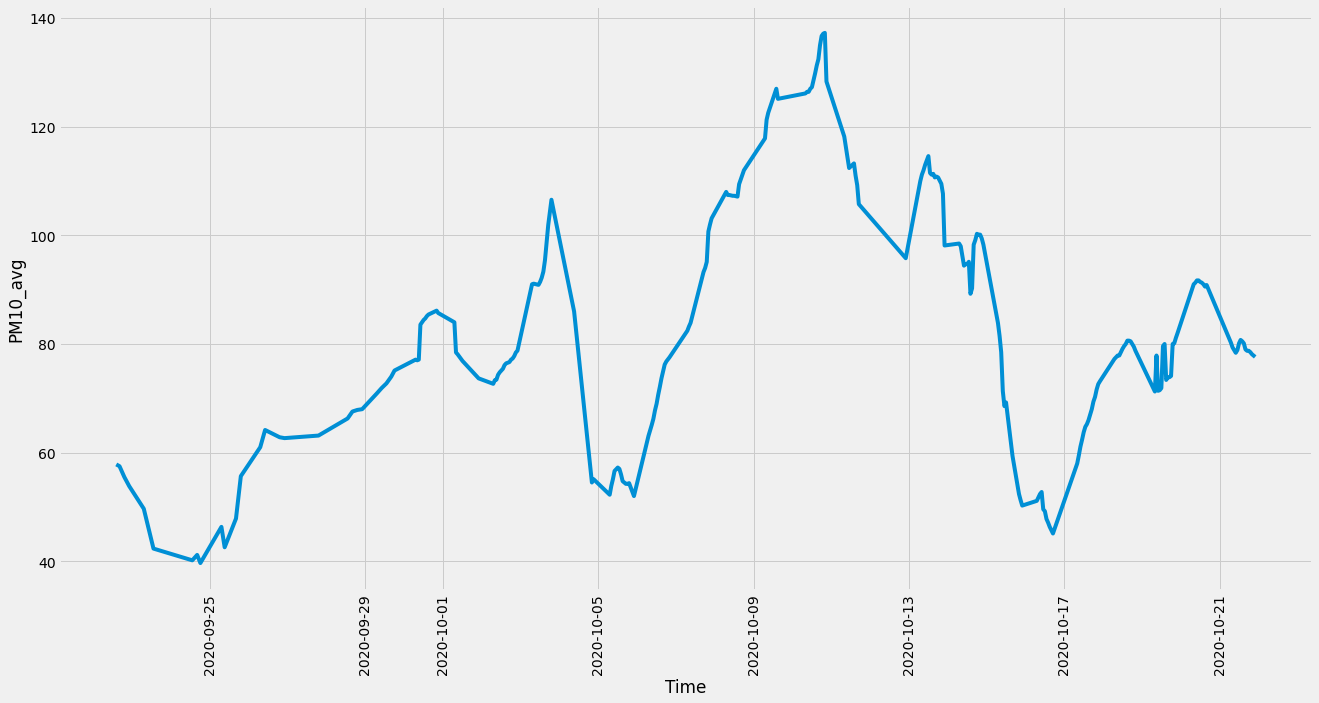

In [32]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'PM10_avg',x = 'Time',data = mum)
plt.xticks(rotation = 90)
plt.show()

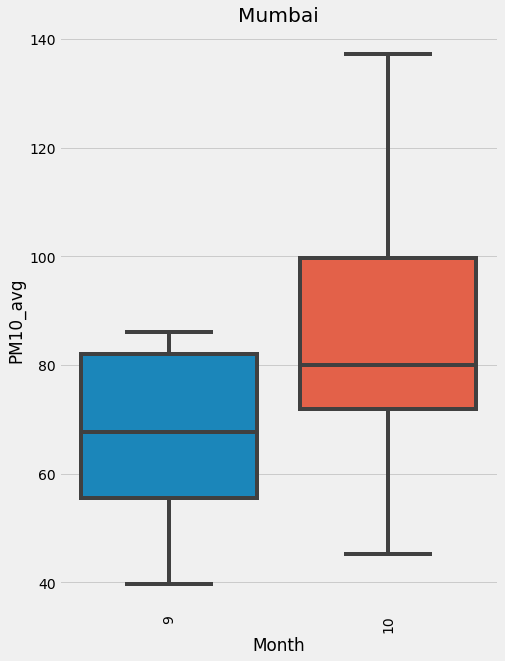

In [33]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'PM10_avg',x = 'Month',data = mum)
plt.title('Mumbai')
plt.xticks(rotation = 90)
plt.show()

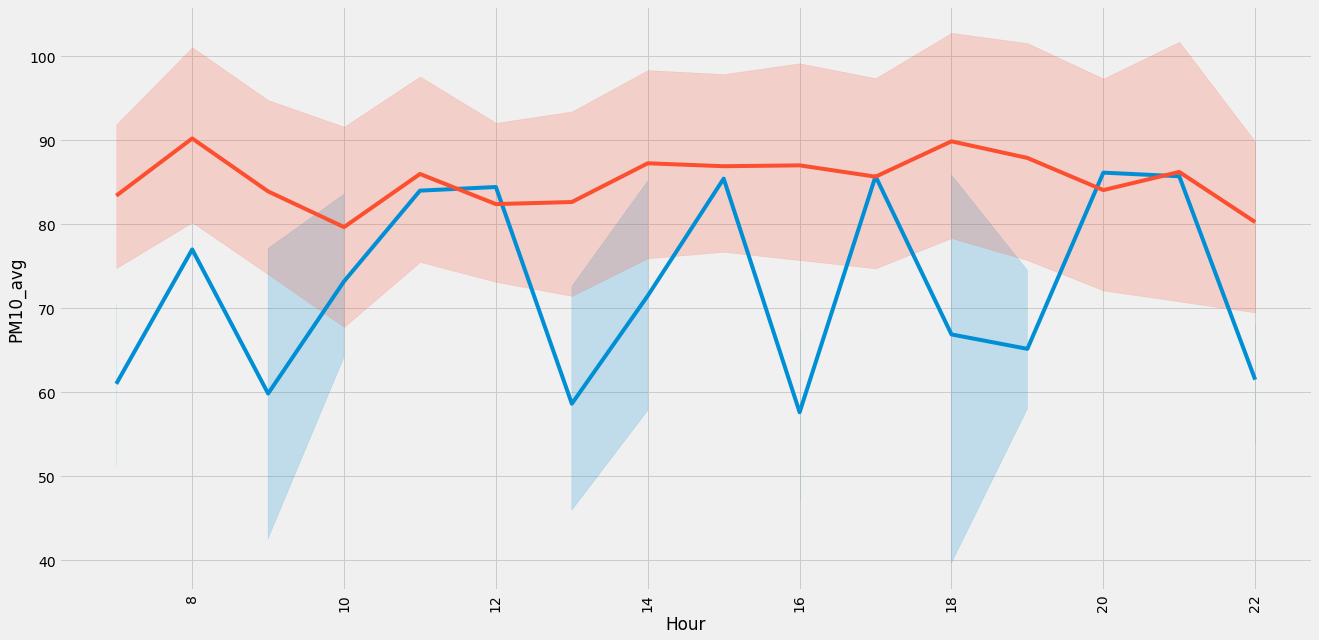

In [34]:
mum_sep = mum[mum.Month == 9].copy()
mum_oct = mum[mum.Month == 10].copy()
plt.figure(figsize = (20,10))
sns.lineplot(y = 'PM10_avg',x = 'Hour',data = mum_sep)
sns.lineplot(y = 'PM10_avg',x = 'Hour',data = mum_oct)
plt.xticks(rotation = 90)
plt.show()